<a href="https://colab.research.google.com/github/yohan2001colombo/DataScience/blob/main/Brownian_Motion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
def BrownianG(m, T, N, sigma, mu, w0, GB = False):
  """
    m = Number of sample paths
    T = Total time
    sigma = scale parameter
    N = number of steps
    mu = drift parameter
    wo = initial value

    Return
    ----------
    numpy array of shape (m, N+1), where the first column
    gives the initial values of each path
  """
  # time step
  dt = T/N
  # creating an array to store simulated values
  x = np.zeros((m, N+1))
  # initial values
  x[:, 0] = w0
  x0 = x[:, 0]

  if not GB:
    r = norm.rvs(size=x0.shape + (N,), loc = mu*dt, scale = sigma*sqrt(dt))
    np.cumsum(r, axis=-1, out=x[:, 1:])
    x[:,1:]  += w0

  else:
     r = norm.rvs(size=x0.shape + (N,), loc = mu*dt, scale = sigma*sqrt(dt))
     np.cumsum(r, axis=-1, out=x[:, 1:])

     if w0 != w0:
      x[:,1:] = w0*np.exp(x[:,1:])
     else :
      x[:,1:] = np.exp(x[:,1:])

  return x



In [4]:
np.zeros((2,1))

array([[0.],
       [0.]])

In [6]:
def BrownianPlot(y,T):
  """
    Arguments
    -----------
    y-array with shape (m,N+1). Each row gives discritizeed version
    of a sample path.There are m sample paths
    T-Total Time

    Returns
    ----------
    A plot of the sample paths
  """
  # Number of steps
  N = y.shape[1]
  # Length of time step
  dt = T/(N-1)

  t = np.linspace(0.0, N*dt, N)
  for k in range(y.shape[0]):
    plt.plot(t,y[k])
  plt.xlabel('Time', fontsize=15)
  plt.ylabel('W_t', fontsize=15)
  plt.show()

In [7]:
def BrownianEnd(y, T, loc):
  """
    Argument
    ---------
    y-array with shape(m,N+1). Each row gives discritized version
    of a sample path.There are m sample paths.
    T-total Time
    loc-location to graph

    Returns
    --------
    A histogram of values which are obtained by discritized the sample
    paths at the given location
  """
  # Number of steps
  N = y.shape[1]
  # Length of a step
  dt = T/(N-1)
  # The position of the Array corresponding to the given location
  pos = int(loc/dt)
  # Histogram
  plt.hist(y[:,pos],bins=25, density=True)
  plt.show()

In [10]:
y = BrownianG(1000,30,150,10,5,100,GB=False)

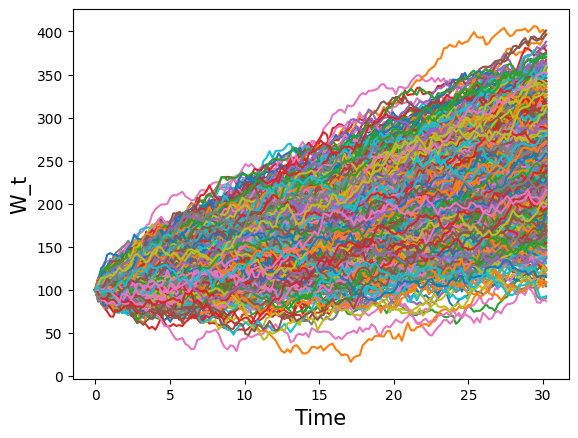

In [11]:
BrownianPlot(y,30)